## 국민건강보험공단_건강검진정보 Open API 데이터 수집 및 전처리

- <a href = "https://www.data.go.kr/iim/api/selectAPIAcountView.do#/API%20%EB%AA%A9%EB%A1%9D/getuddi%3A4be8523e-2fd4-457d-a594-ac1fbba444b5">출처: 공공데이터 포털 - 국민건강보험공단_건강검진정보</a>
<br></br>
<font size = 4> 이 프로젝트는 Jupyter Notebook 상에서 작성되었습니다</font>

### 가설 설정

- 가설 1: [지도학습] 간 수치로 음주 여부를 판단할 수 있을까?
- 가설 2: [통계검정] BMI와 혈압은 상관관계가 있을까?
- 가설 3: [비지도학습] 음주가 시력에 안 좋은 영향을 미칠까?¶

### API 수집을 위한 request 라이브러리 설치

In [1]:
!pip install requests

In [2]:
import requests
import pandas as pd

# Define the API key
skey = 'OaE7WFXPyKXCPtSvtE9HuQdSwbzhl/C9FhjkxVzyOfKLRZxqAMChtLhArevfCux2XuluPYLtgDuMUEPXvGaoNQ=='

# Define the API endpoint and parameters
url = f'https://api.odcloud.kr/api/15007122/v1/uddi:0c59c663-3222-4e70-80eb-fb993b5bacf7?page=1&perPage=3000'
params = {
    'page': 1,
    'perPage': 3000,
    'serviceKey': skey  # Add the API key here
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert the JSON data to a DataFrame
    df = pd.json_normalize(data['data'])

    # Print the DataFrame
    df
else:
    print(f"Failed to retrieve data: {response.status_code}")
    print(response.json())


In [3]:
df

,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진수검여부,기준년도,성별,수축기혈압,시도코드,시력(우),...,총콜레스테롤,치석,치아우식증유무,트리글리세라이드,허리둘레,혈색소,혈청지오티(AST),혈청지피티(ALT),혈청크레아티닌,흡연상태
0,None,None,4400892,28,0,2021,1,110,41,1.00,...,None,None,None,None,86.4,14.3,18.0,20,0.80,1
1,None,None,2358945,74,0,2021,1,126,41,1.00,...,None,None,None,None,94.0,16.0,58.0,144,0.80,1
2,None,None,2369829,38,0,2021,1,183,41,1.00,...,None,None,None,None,80.0,13.8,32.0,26,0.80,1
3,None,None,1761219,35,0,2021,2,166,41,1.00,...,None,None,None,None,74.0,13.2,23.0,15,0.80,1
4,None,None,2312054,21,0,2021,2,135,41,1.00,...,None,None,None,None,80.0,13.8,17.0,9,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,None,None,3842719,14,0,2021,2,114,41,1.20,...,None,None,None,None,78.0,13.3,18.0,14,0.80,1
2996,None,None,2477164,25,0,2021,1,148,41,1.00,...,None,None,None,None,88.0,16.4,19.0,19,0.80,1
2997,None,None,4533710,14,0,2021,2,108,41,0.60,...,None,None,None,None,83.0,12.9,24.0,22,0.80,1
2998,None,None,189217,14,0,2021,2,122,41,0.80,...,None,None,None,None,74.0,12.4,23.0,23,0.80,1


In [4]:
print(df.columns)

Index(['HDL콜레스테롤', 'LDL콜레스테롤', '가입자일련번호', '감마지티피', '구강검진수검여부', '기준년도', '성별',
       '수축기혈압', '시도코드', '시력(우)', '시력(좌)', '식전혈당(공복혈당)', '신장(5cm단위)',
       '연령대코드(5세단위)', '요단백', '음주여부', '이완기혈압', '청력(우)', '청력(좌)', '체중(5kg단위)',
       '총콜레스테롤', '치석', '치아우식증유무', '트리글리세라이드', '허리둘레', '혈색소', '혈청지오티(AST)',
       '혈청지피티(ALT)', '혈청크레아티닌', '흡연상태'],
      dtype='object')


### 필요한 칼럼만 추출 후 데이터프레임을 별도의 csv파일로 저장

In [5]:
df = df[[ '감마지티피',  '시력(우)', '시력(좌)','청력(우)', '청력(좌)',
       '수축기혈압', '식전혈당(공복혈당)', '신장(5cm단위)',
        '요단백', '음주여부', '이완기혈압', '체중(5kg단위)',
      '허리둘레', '혈색소', '혈청지오티(AST)',
       '혈청지피티(ALT)', '혈청크레아티닌', '흡연상태']]

In [6]:
'''코드를 돌릴 때 매번 API를 호출하기 번거로워 별도의 csv파일로 저장했습니다'''
# df.to_csv('healthcare.csv', encoding = 'cp949')

'코드를 돌릴 때 매번 API를 호출하기 번거로워 별도의 csv파일로 저장했습니다'

### csv파일 불러오기

In [513]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

'''Jupyter Notebook 다크 테마 사용시 필요'''
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


#file_path = '/content/drive/MyDrive/ADA/'
health_df = pd.read_csv('./healthcare.csv', encoding = 'cp949', index_col = 0)
health_df.head()

,감마지티피,시력(우),시력(좌),청력(우),청력(좌),수축기혈압,식전혈당(공복혈당),신장(5cm단위),요단백,음주여부,이완기혈압,체중(5kg단위),허리둘레,혈색소,혈청지오티(AST),혈청지피티(ALT),혈청크레아티닌,흡연상태
0,28,1.0,1.0,1,1,110,179,160,1,1,72,65,86.4,14.3,18.0,20,0.8,1
1,74,1.0,1.0,1,1,126,86,175,1,1,76,90,94.0,16.0,58.0,144,0.8,1
2,38,1.0,1.0,1,1,183,115,160,1,1,109,55,80.0,13.8,32.0,26,0.8,1
3,35,1.0,1.0,1,1,166,102,155,1,1,115,50,74.0,13.2,23.0,15,0.8,1
4,21,1.0,1.0,1,1,135,86,155,1,1,70,65,80.0,13.8,17.0,9,0.8,1


### 한글 폰트 설정

In [514]:
import os

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [515]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   감마지티피       3000 non-null   int64  
 1   시력(우)       3000 non-null   float64
 2   시력(좌)       3000 non-null   float64
 3   청력(우)       3000 non-null   int64  
 4   청력(좌)       3000 non-null   int64  
 5   수축기혈압       3000 non-null   int64  
 6   식전혈당(공복혈당)  3000 non-null   int64  
 7   신장(5cm단위)   3000 non-null   int64  
 8   요단백         3000 non-null   int64  
 9   음주여부        3000 non-null   int64  
 10  이완기혈압       3000 non-null   int64  
 11  체중(5kg단위)   3000 non-null   int64  
 12  허리둘레        2999 non-null   float64
 13  혈색소         3000 non-null   float64
 14  혈청지오티(AST)  3000 non-null   float64
 15  혈청지피티(ALT)  3000 non-null   int64  
 16  혈청크레아티닌     3000 non-null   float64
 17  흡연상태        3000 non-null   int64  
dtypes: float64(6), int64(12)
memory usage: 445.3 KB


### 결측치 처리

#### 결측치 확인

In [516]:
health_df.isnull().sum()

감마지티피         0
시력(우)         0
시력(좌)         0
청력(우)         0
청력(좌)         0
수축기혈압         0
식전혈당(공복혈당)    0
신장(5cm단위)     0
요단백           0
음주여부          0
이완기혈압         0
체중(5kg단위)     0
허리둘레          1
혈색소           0
혈청지오티(AST)    0
혈청지피티(ALT)    0
혈청크레아티닌       0
흡연상태          0
dtype: int64

#### 결측치 처리

In [517]:
#허리둘레 결측치 처리
mean_waist = health_df['허리둘레'].mean()
health_df['허리둘레'].fillna(mean_waist, inplace = True)

In [518]:
health_df.isnull().sum()    #허리둘레 칼럼 결측치 채워짐

감마지티피         0
시력(우)         0
시력(좌)         0
청력(우)         0
청력(좌)         0
수축기혈압         0
식전혈당(공복혈당)    0
신장(5cm단위)     0
요단백           0
음주여부          0
이완기혈압         0
체중(5kg단위)     0
허리둘레          0
혈색소           0
혈청지오티(AST)    0
혈청지피티(ALT)    0
혈청크레아티닌       0
흡연상태          0
dtype: int64

### 데이터 가공 및 전처리

#### 수축기혈압과 이완기혈압을 이용해 평균 혈압을 계산
<br></br>
$$\text{MAP} = \text{이완기 혈압}+ \frac{1}{3}\text{(수축기 혈압−이완기 혈압)}$$

공식의 근거(출처): <a href = "http://www.monews.co.kr/news/articleView.html?idxno=107487">평균 동맥압</a>

In [519]:
health_df['평균동맥압'] = np.round((2 * health_df['이완기혈압'] + health_df['수축기혈압'])/3 ,2)
health_df.head()

,감마지티피,시력(우),시력(좌),청력(우),청력(좌),수축기혈압,식전혈당(공복혈당),신장(5cm단위),요단백,음주여부,이완기혈압,체중(5kg단위),허리둘레,혈색소,혈청지오티(AST),혈청지피티(ALT),혈청크레아티닌,흡연상태,평균동맥압
0,28,1.0,1.0,1,1,110,179,160,1,1,72,65,86.4,14.3,18.0,20,0.8,1,84.67
1,74,1.0,1.0,1,1,126,86,175,1,1,76,90,94.0,16.0,58.0,144,0.8,1,92.67
2,38,1.0,1.0,1,1,183,115,160,1,1,109,55,80.0,13.8,32.0,26,0.8,1,133.67
3,35,1.0,1.0,1,1,166,102,155,1,1,115,50,74.0,13.2,23.0,15,0.8,1,132.00
4,21,1.0,1.0,1,1,135,86,155,1,1,70,65,80.0,13.8,17.0,9,0.8,1,91.67


#### 신장과 체중을 이용해 대략적인 BMI 수치 계산
$$BMI = \frac{체중}{신장(m)^2}$$

In [520]:
health_df['BMI'] = np.round(health_df['체중(5kg단위)']/(health_df['신장(5cm단위)']/100)**2, 2)
health_df.head()

,감마지티피,시력(우),시력(좌),청력(우),청력(좌),수축기혈압,식전혈당(공복혈당),신장(5cm단위),요단백,음주여부,이완기혈압,체중(5kg단위),허리둘레,혈색소,혈청지오티(AST),혈청지피티(ALT),혈청크레아티닌,흡연상태,평균동맥압,BMI
0,28,1.0,1.0,1,1,110,179,160,1,1,72,65,86.4,14.3,18.0,20,0.8,1,84.67,25.39
1,74,1.0,1.0,1,1,126,86,175,1,1,76,90,94.0,16.0,58.0,144,0.8,1,92.67,29.39
2,38,1.0,1.0,1,1,183,115,160,1,1,109,55,80.0,13.8,32.0,26,0.8,1,133.67,21.48
3,35,1.0,1.0,1,1,166,102,155,1,1,115,50,74.0,13.2,23.0,15,0.8,1,132.00,20.81
4,21,1.0,1.0,1,1,135,86,155,1,1,70,65,80.0,13.8,17.0,9,0.8,1,91.67,27.06


#### 시력(좌)와 시력(우)로 평균 시력 데이터 추가

In [521]:
health_df['평균시력'] = (health_df['시력(좌)'] + health_df['시력(우)'])/2
health_df.head()

,감마지티피,시력(우),시력(좌),청력(우),청력(좌),수축기혈압,식전혈당(공복혈당),신장(5cm단위),요단백,음주여부,...,체중(5kg단위),허리둘레,혈색소,혈청지오티(AST),혈청지피티(ALT),혈청크레아티닌,흡연상태,평균동맥압,BMI,평균시력
0,28,1.0,1.0,1,1,110,179,160,1,1,...,65,86.4,14.3,18.0,20,0.8,1,84.67,25.39,1.0
1,74,1.0,1.0,1,1,126,86,175,1,1,...,90,94.0,16.0,58.0,144,0.8,1,92.67,29.39,1.0
2,38,1.0,1.0,1,1,183,115,160,1,1,...,55,80.0,13.8,32.0,26,0.8,1,133.67,21.48,1.0
3,35,1.0,1.0,1,1,166,102,155,1,1,...,50,74.0,13.2,23.0,15,0.8,1,132.00,20.81,1.0
4,21,1.0,1.0,1,1,135,86,155,1,1,...,65,80.0,13.8,17.0,9,0.8,1,91.67,27.06,1.0


### 변수 데이터 찍어보기

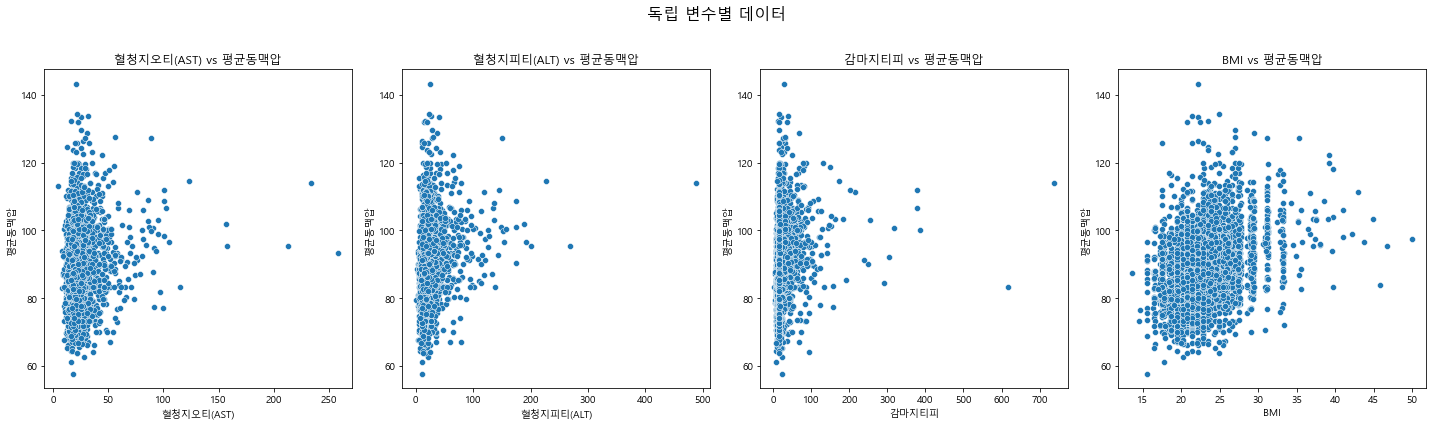

In [522]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
fig.suptitle('독립 변수별 데이터', fontsize=16)

columns = ['혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', 'BMI']

for i, col in enumerate(columns):
    sns.scatterplot(x=health_df[col], y=health_df['평균동맥압'], ax=axes[i])  # i 인덱스를 사용하여 축에 접근
    
    axes[i].set_title(f'{col} vs 평균동맥압')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('평균동맥압')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Outlier 제거: $|Z| \geq 2.58$ 인 데이터 기준

In [523]:
from scipy.stats import zscore
columns_to_check = ['혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']   #BMI는 통계 검정에 쓸 예정이라 일단 놔둠

# Filter out rows with any z-score in the specified columns having absolute value >= 2.58
health_df = health_df[(z_scores.abs() < 2.58).all(axis=1)]

health_df.reset_index(drop=True, inplace=True)
health_df.shape     

(2886, 21)

In [524]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   감마지티피       2886 non-null   int64  
 1   시력(우)       2886 non-null   float64
 2   시력(좌)       2886 non-null   float64
 3   청력(우)       2886 non-null   int64  
 4   청력(좌)       2886 non-null   int64  
 5   수축기혈압       2886 non-null   int64  
 6   식전혈당(공복혈당)  2886 non-null   int64  
 7   신장(5cm단위)   2886 non-null   int64  
 8   요단백         2886 non-null   int64  
 9   음주여부        2886 non-null   int64  
 10  이완기혈압       2886 non-null   int64  
 11  체중(5kg단위)   2886 non-null   int64  
 12  허리둘레        2886 non-null   float64
 13  혈색소         2886 non-null   float64
 14  혈청지오티(AST)  2886 non-null   float64
 15  혈청지피티(ALT)  2886 non-null   int64  
 16  혈청크레아티닌     2886 non-null   float64
 17  흡연상태        2886 non-null   int64  
 18  평균동맥압       2886 non-null   float64
 19  BMI         2886 non-null  

## 가설 1: 간수치로 음주 여부를 판단할 수 있을까?

- $y$ : '음주여부'
- $x$: ['혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

### 독립변수와 종속변수 설정

In [525]:
features = health_df[['혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']]
labels = health_df['음주여부']

features.shape, labels.shape

((2886, 3), (2886,))

### 변수들 간 다중공선성 검정

In [526]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

#### Correlation Matrix 출력

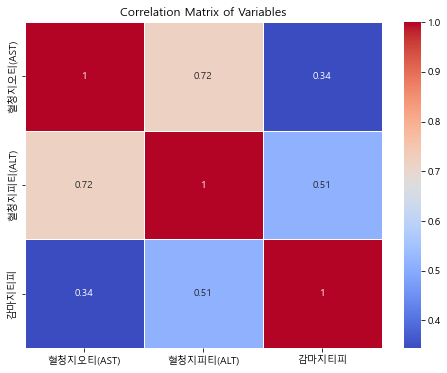

In [527]:
correlation_matrix = features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

#### VIF 계산

In [528]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding a constant column for intercept
X = add_constant(features)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature       VIF
0       const  1.000000
1  혈청지오티(AST)  2.060474
2  혈청지피티(ALT)  2.462127
3       감마지티피  1.357571


C:\Users\82107\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 사이킷런 메서드 호출 및 Train, Test 분리

In [566]:
X = features
y = labels

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 156)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2308, 3) (578, 3)
(2308,) (578,)


In [555]:
# y_train의 유형 확인
print(np.unique(y_train))


[0 1]


### 보팅 분류 모델 설계

In [563]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [567]:
dt_clf = DecisionTreeClassifier(random_state = 156)
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators = [('DT', dt_clf), ('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

#하이퍼파리미터 튜닝
params = {
    'DT__max_depth': [6, 8, 12, 24],
    'DT__min_samples_split': [4, 8, 16],
    'DT__min_samples_leaf': [2, 6, 12],
    'LR__C': [0.01, 0.1, 1.0, 10.0],
    'KNN__n_neighbors': [3, 6, 9, 12] 
}

grid = GridSearchCV(estimator=vo_clf, param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'DT__max_depth': 6, 'DT__min_samples_leaf': 6, 'DT__min_samples_split': 4, 'KNN__n_neighbors': 12, 'LR__C': 1.0}
Best cross-validation accuracy: 0.5641321801842409


### 모델 정확도 출력하기

In [570]:
y_pred = grid.best_estimator_.predict(X_test)
y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]  # 소프트 투표를 사용하는 경우 확률 예측 필요

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2)  # recall이 더 중요하다고 판단해서 beta = 2로 설정

roc_auc = roc_auc_score(y_test, y_proba)

# 성능 지표 출력
print("Test accuracy:", np.round(accuracy,2))
print("Precision:", np.round(precision,2))
print("Recall:", np.round(recall, 2))
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score: ", np.round(f2,2))

Test accuracy: 0.59
Precision: 0.6
Recall: 0.88
Confusion Matrix:
 [[ 43 200]
 [ 39 296]]
F1 Score:  0.81


### ROC - Curve 그리기

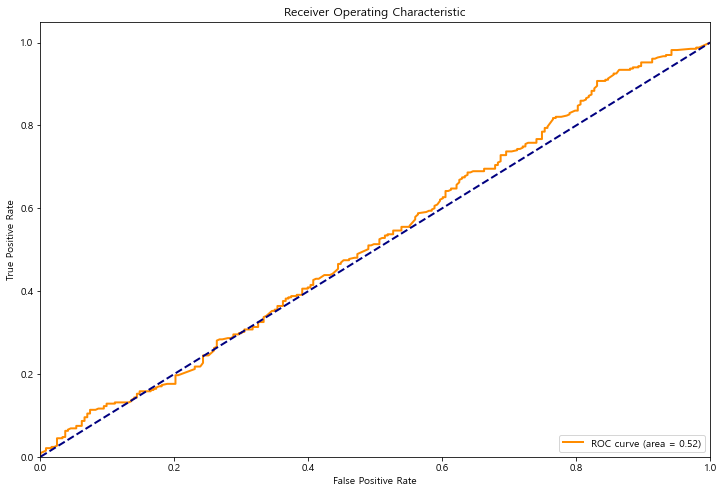

In [571]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 가설 1에 대한 결론

<font size = 4>[분류 분석 결과]</font>

Recall = 0.88
<br></br>
<font size = 4>[결론]</font>

음주 여부를 예측하는 모델에서 높은 재현율(Recall)인 0.88을 달성한 것은 모델이 실제로 음주로 인한 간 건강 위험이 있는 사람들을 효과적으로 식별해내고 있음을 나타냅니다. 이는 모델이 실제로 위험한 상태인 사람들을 대부분 놓치지 않고 잘 포착하고 있다는 의미로, 음주로 인한 간 건강 문제를 조기에 감지하여 적절한 조치를 취할 수 있는 기반을 마련해줍니다.
<br></br>
<font size = 4>[인사이트]</font>

이 결과는 음주로 인한 건강 위험을 가능한 한 많이 포착하고, 필요한 의료적 개입을 제공하여 개인의 건강을 보호하고 간 건강 문제의 진행을 예방할 수 있도록 합니다. 따라서 높은 재현율은 의료 서비스 제공자와 공중 보건 정책 입안자에게 음주 관련 건강 위험을 인식시키고, 조기 개입을 통해 건강 문제를 관리할 수 있는 중요한 정보를 제공합니다.

## 가설 2

### 가설 2.1. BMI와 혈압이 상관관계가 있을까?

#### BMI 데이터의 분포 형태 확인

C:\Users\82107\AppData\Local\Temp/ipykernel_588/3470957701.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')


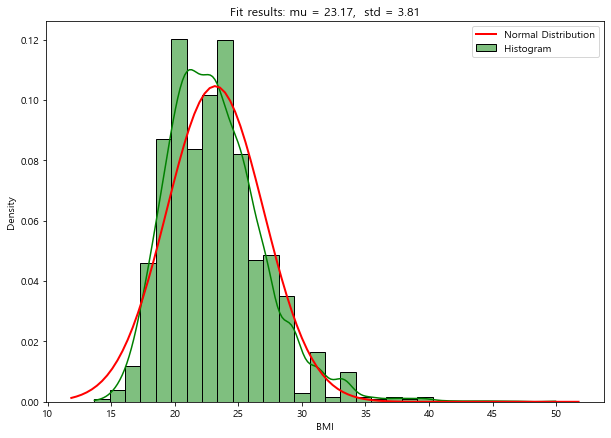

In [535]:
plt.figure(figsize=(10, 7))

sns.histplot(health_df['BMI'], kde=True, stat="density", bins=30, color='green', label='Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, health_df['BMI'].mean(), health_df['BMI'].std())
plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(health_df['BMI'].mean(), health_df['BMI'].std())
plt.title(title)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

#### 평균동맥압 데이터의 분포도 확인

C:\Users\82107\AppData\Local\Temp/ipykernel_588/5907487.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')


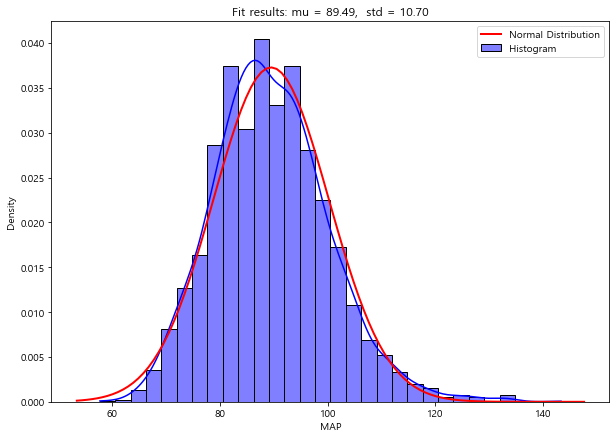

In [536]:
plt.figure(figsize=(10, 7))

sns.histplot(health_df['평균동맥압'], kde=True, stat="density", bins=30, color='blue', label='Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, health_df['평균동맥압'].mean(), health_df['평균동맥압'].std())
plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(health_df['평균동맥압'].mean(), health_df['평균동맥압'].std())
plt.title(title)
plt.xlabel("MAP")
plt.ylabel("Density")
plt.legend()
plt.show()

#### 비만도 유형 카테고리화

BMI에 따라서 비만 유형을 다음과 같이 분류 가능 (mean = 23.17, std = 3.81)
- BMI(~ 18.5) : 저체중
- BMI(18.5 ~ 23) : 정상
- BMI(23 ~ 25) : 과체중
- BMI(25 ~ 30) : 경도비만
- BMI(30 ~ 35) : 중증도비만
- BMI(35 ~ ) : 고도비만



출처: <a href = "https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5292">비만도 유형 분류 기준</a>

In [537]:
from scipy import stats

conditions = [
    (health_df['BMI'] < 18.5),
    (health_df['BMI'] >= 18.5) & (health_df['BMI'] < 23),
    (health_df['BMI'] >= 23) & (health_df['BMI'] < 25),
    (health_df['BMI'] >= 25) & (health_df['BMI'] < 30),
    (health_df['BMI'] >= 30) & (health_df['BMI'] < 35),
    (health_df['BMI'] >= 35)
]

categories = ['underweight', 'normal', 'overweight', 'obese_light', 'obese_mid', 'obese_high']
health_df['BMI_category'] = np.select(conditions, categories, default='Unknown')


anova_results = stats.f_oneway(health_df[health_df['BMI_category'] == 'underweight']['평균동맥압'],
                               health_df[health_df['BMI_category'] == 'normal']['평균동맥압'],
                               health_df[health_df['BMI_category'] == 'overweight']['평균동맥압'],
                               health_df[health_df['BMI_category'] == 'obese_light']['평균동맥압'],
                               health_df[health_df['BMI_category'] == 'obese_mid']['평균동맥압'],
                               health_df[health_df['BMI_category'] == 'obese_high']['평균동맥압']
                              )

print("ANOVA 결과: F-value =", np.round(anova_results.statistic, 2), ", P-value =", np.round(anova_results.pvalue,2))

ANOVA 결과: F-value = 59.33 , P-value = 0.0


#### ANOVA 테이블 그리기

In [538]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 모델 정의 및 ANOVA 수행
model = ols('평균동맥압 ~ C(BMI_category)', data=health_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# 그룹별로 SS, DF 계산 추가
group_means = health_df.groupby('BMI_category')['평균동맥압'].mean()
overall_mean = health_df['평균동맥압'].mean()
ss_total = sum((health_df['평균동맥압'] - overall_mean)**2)
ss_between = sum(health_df.groupby('BMI_category').size() * (group_means - overall_mean)**2)
df_between = health_df['BMI_category'].nunique() - 1
ss_within = ss_total - ss_between
df_within = len(health_df) - health_df['BMI_category'].nunique()
ms_between = ss_between / df_between
ms_within = ss_within / df_within
f_value = ms_between / ms_within
p_value = stats.f.sf(f_value, df_between, df_within)

# ANOVA 테이블 완성
anova_table = pd.DataFrame({
    "Source of Variation": ["Between Groups", "Within Groups", "Total"],
    "SS": [ss_between, ss_within, ss_total],
    "DF": [df_between, df_within, len(data) - 1],
    "MS": [ms_between, ms_within, ""],
    "F Value": [f_value, "", ""],
    "P Value": [p_value, "", ""]
})

anova_table = pd.DataFrame(anova_table)
anova_table

,Source of Variation,SS,DF,MS,F Value,P Value
0,Between Groups,30839.220229,5,6167.844046,59.328381,0.0
1,Within Groups,299407.981916,2880,103.961105,,
2,Total,330247.202145,2885,,,


#### ANOVA 분석 결과 시각화

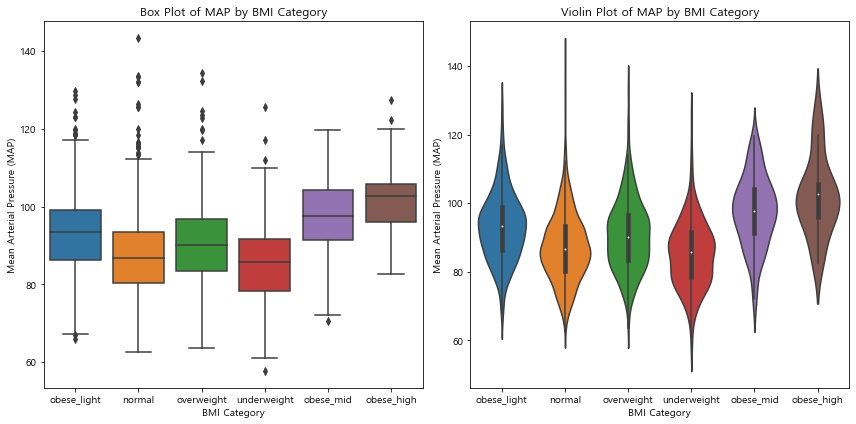

In [539]:
plt.figure(figsize=(12, 6))

# 박스플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='BMI_category', y='평균동맥압', data=health_df)
plt.title('Box Plot of MAP by BMI Category')
plt.ylabel('Mean Arterial Pressure (MAP)')
plt.xlabel('BMI Category')

# 바이올린 플롯
plt.subplot(1, 2, 2)
sns.violinplot(x='BMI_category', y='평균동맥압', data=health_df)
plt.title('Violin Plot of MAP by BMI Category')
plt.ylabel('Mean Arterial Pressure (MAP)')
plt.xlabel('BMI Category')

plt.tight_layout()
plt.show()

### 가설 2.2. 감마지티피와 음주여부는 상관관계가 있을까?

#### 감마지티피 데이터 분포 형태 확인

C:\Users\82107\AppData\Local\Temp/ipykernel_588/3477334063.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')


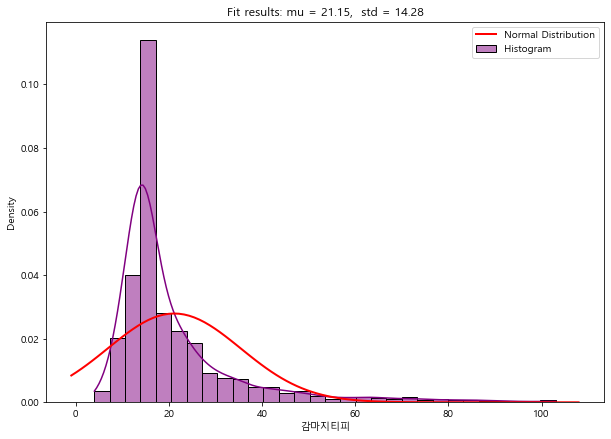

In [540]:
plt.figure(figsize=(10, 7))

sns.histplot(health_df['감마지티피'], kde=True, stat="density", bins=30, color='purple', label='Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, health_df['감마지티피'].mean(), health_df['감마지티피'].std())
plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(health_df['감마지티피'].mean(), health_df['감마지티피'].std())
plt.title(title)
plt.xlabel("감마지티피")
plt.ylabel("Density")
plt.legend()
plt.show()

#### 음주여부 카테고리화

In [541]:
from scipy import stats

conditions = [
    (health_df['음주여부'] < 1),
    (health_df['음주여부'] >= 1) 
]

categories = ['non_alcoholic', 'alcoholic']
health_df['alcohol_category'] = np.select(conditions, categories, default='Unknown')


anova_results = stats.f_oneway(health_df[health_df['alcohol_category'] == 'non_alcoholic']['감마지티피'],
                               health_df[health_df['alcohol_category'] == 'alcoholic']['감마지티피']
                              )

print("ANOVA 결과: F-value =", np.round(anova_results.statistic, 2), ", P-value =", np.round(anova_results.pvalue,2))

ANOVA 결과: F-value = 5.15 , P-value = 0.02


#### ANOVA 테이블 그리기

In [542]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 모델 정의 및 ANOVA 수행
model = ols('감마지티피 ~ C(alcohol_category)', data=health_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# 그룹별로 SS, DF 계산 추가
group_means = health_df.groupby('alcohol_category')['감마지티피'].mean()
overall_mean = health_df['감마지티피'].mean()
ss_total = sum((health_df['감마지티피'] - overall_mean)**2)
ss_between = sum(health_df.groupby('alcohol_category').size() * (group_means - overall_mean)**2)
df_between = health_df['alcohol_category'].nunique() - 1
ss_within = ss_total - ss_between
df_within = len(health_df) - health_df['alcohol_category'].nunique()
ms_between = ss_between / df_between
ms_within = ss_within / df_within
f_value = ms_between / ms_within
p_value = stats.f.sf(f_value, df_between, df_within)

# ANOVA 테이블 완성
anova_table = pd.DataFrame({
    "Source of Variation": ["Between Groups", "Within Groups", "Total"],
    "SS": [ss_between, ss_within, ss_total],
    "DF": [df_between, df_within, len(data) - 1],
    "MS": [ms_between, ms_within, ""],
    "F Value": [f_value, "", ""],
    "P Value": [p_value, "", ""]
})

anova_table = pd.DataFrame(anova_table)
anova_table

,Source of Variation,SS,DF,MS,F Value,P Value
0,Between Groups,1048.432914,1,1048.432914,5.148906,0.023335
1,Within Groups,587247.153018,2884,203.622453,,
2,Total,588295.585932,2885,,,


#### ANOVA 분석 결과 시각화

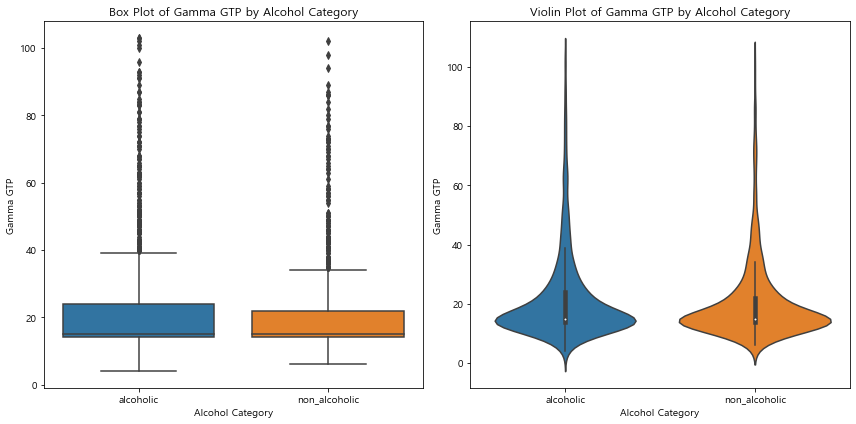

In [543]:
plt.figure(figsize=(12, 6))

# 박스플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='alcohol_category', y='감마지티피', data=health_df)
plt.title('Box Plot of Gamma GTP by Alcohol Category')
plt.ylabel('Gamma GTP')
plt.xlabel('Alcohol Category')

# 바이올린 플롯
plt.subplot(1, 2, 2)
sns.violinplot(x='alcohol_category', y='감마지티피', data=health_df)
plt.title('Violin Plot of Gamma GTP by Alcohol Category')
plt.ylabel('Gamma GTP')
plt.xlabel('Alcohol Category')

plt.tight_layout()
plt.show()

### 가설 2에 대한 결론

<font size = 4>[ANOVA 분석 결과] </font>

가설 2.1 : p-value가 0에 가깝게 나왔습니다. 이 결과는 BMI 그룹 간에 평균동맥압(MAP)의 차이가 통계적으로 매우 유의미하다는 것을 나타냅니다. 특히, ANOVA의 p-value가 매우 낮다는 것은 귀무 가설(그룹 간에 차이가 없다)을 기각하고, 대립 가설(BMI 그룹 간에 MAP의 차이가 있다)을 지지합니다.

가설 2.2 : p-value가 0에 가깝게 나왔습니다. 이 결과는 음주여부 그룹 간에 감마지티피의 차이가 통계적으로 매우 유의미하다는 것을 나타냅니다. 특히, ANOVA의 p-value가 매우 낮다는 것은 귀무 가설(그룹 간에 차이가 없다)을 기각하고, 대립 가설(음주여부 그룹 간에 감마지티피의 차이가 있다)을 지지합니다.
<br></br>
<font size = 4>[결론]</font>

이 분석으로부터, BMI 수치가 다른 그룹 간에 평균동맥압의 차이가 존재한다는 결론을 도출할 수 있습니다. 즉, BMI가 높거나 낮은 그룹은 평균동맥압이 서로 다를 가능성이 높습니다. 이는 BMI가 심혈관 건강에 영향을 미칠 수 있는 중요한 지표임을 시사합니다. 또한, 음주여부가 다른 그룹 간에 감마지티피의 차이가 존재한다는 결론을 도출할 수 있습니다.
 γ-GTP는 특히 알코올에 민감하다는 수치라는 점을 생각하면 유의미한 결과임을 시사합니다
<br></br>
<font size = 4>[인사이트]</font>

이 연구 결과는 공중 보건 정책 입안자들에게 고 BMI 그룹을 대상으로 한 특정 건강 강화 및 예방 프로그램의 필요성을 강조합니다. 예를 들어, 비만과 과체중을 감소시키기 위한 식습관 개선과 체중 관리 프로그램이 심혈관 질환 예방에 중요할 수 있습니다. 또한, 가설 1에서 음주여부가 간 경화 등 질환과 관련이 있다는 주장을 뒷받침해주는 추가 근거가 될 수 있습니다.

## 가설 3: 음주가 시력에 안 좋은 영향을 미칠까?

<font size = 4>가설 1과 2에서 간 수치로 음주 여부를 어느정도 판단 가능함을 입증하였기 때문에, 감마지티피와 시력 간에 유사성이 있는 지 확인하는 분석을 진행하겠습니다.</font>

In [544]:
health_df

,감마지티피,시력(우),시력(좌),청력(우),청력(좌),수축기혈압,식전혈당(공복혈당),신장(5cm단위),요단백,음주여부,...,혈색소,혈청지오티(AST),혈청지피티(ALT),혈청크레아티닌,흡연상태,평균동맥압,BMI,평균시력,BMI_category,alcohol_category
0,28,1.0,1.0,1,1,110,179,160,1,1,...,14.3,18.0,20,0.8,1,84.67,25.39,1.0,obese_light,alcoholic
1,38,1.0,1.0,1,1,183,115,160,1,1,...,13.8,32.0,26,0.8,1,133.67,21.48,1.0,normal,alcoholic
2,35,1.0,1.0,1,1,166,102,155,1,1,...,13.2,23.0,15,0.8,1,132.00,20.81,1.0,normal,alcoholic
3,21,1.0,1.0,1,1,135,86,155,1,1,...,13.8,17.0,9,0.8,1,91.67,27.06,1.0,obese_light,alcoholic
4,7,1.0,1.0,1,1,112,92,160,1,1,...,12.6,17.0,13,0.8,1,81.33,19.53,1.0,normal,alcoholic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,14,1.2,1.2,1,1,114,101,160,1,0,...,13.3,18.0,14,0.8,1,87.33,23.44,1.2,overweight,non_alcoholic
2882,25,1.0,1.2,1,1,148,103,165,1,0,...,16.4,19.0,19,0.8,1,108.67,25.71,1.1,obese_light,non_alcoholic
2883,14,0.6,0.8,1,1,108,94,165,1,0,...,12.9,24.0,22,0.8,1,82.00,27.55,0.7,obese_light,non_alcoholic
2884,14,0.8,0.8,1,1,122,93,160,1,0,...,12.4,23.0,23,0.8,1,90.00,23.44,0.8,overweight,non_alcoholic


### K-평균 클러스터링 모델 설계

In [545]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# 스케일링을 위해 '감마지티피'와 '평균시력' 칼럼만 선택
features = health_df[['감마지티피', '허리둘레']]

# KMeans 클러스터링
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=11)
kmeans.fit(features)
print(kmeans.labels_)

[0 1 0 ... 0 0 0]


C:\Users\82107\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 군집 시각화

C:\Users\82107\AppData\Local\Temp/ipykernel_588/1831055847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = kmeans.labels_


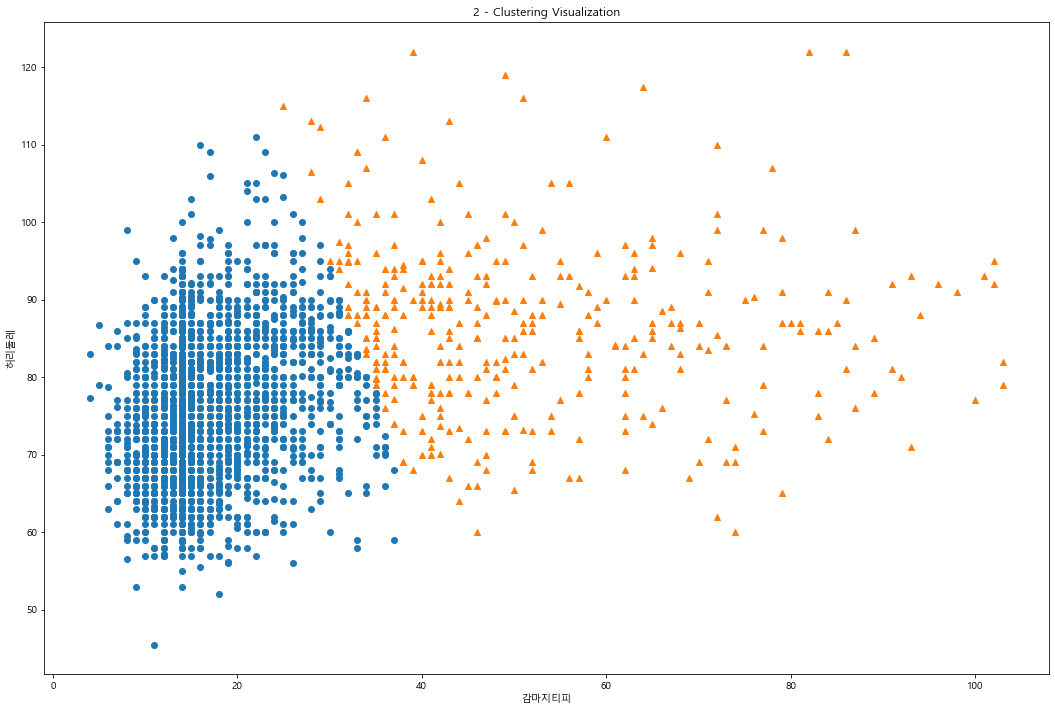

In [546]:
features['Cluster'] = kmeans.labels_

marker0_ind = features[features['Cluster'] == 0].index
marker1_ind = features[features['Cluster'] == 1].index

plt.figure(figsize = (18, 12))
plt.scatter(x = features.loc[marker0_ind, '감마지티피'], y = features.loc[marker0_ind, '허리둘레'], marker = 'o')
plt.scatter(x = features.loc[marker1_ind, '감마지티피'], y = features.loc[marker1_ind, '허리둘레'], marker = '^')

plt.xlabel('감마지티피')
plt.ylabel('허리둘레')
plt.title('2 - Clustering Visualization')
plt.show()

### 피어슨 상관계수

In [547]:
correlation = health_df['감마지티피'].corr(health_df['허리둘레'])
print("상관계수 (감마지티피와 허리둘레):", np.round(correlation,1))

상관계수 (감마지티피와 허리둘레): 0.4


### 가설 3에 대한 결론

<font size = 4>[결론]</font>

감마지피티(Gamma-GTP)와 허리둘레 간에 상관계수가 0.4로 나타난 결과는 두 변수 사이에 중간 정도의 양의 상관관계가 있음을 나타냅니다. 이는 감마지피티 수치가 높을수록 허리둘레도 커지는 경향이 있음을 시사합니다. 상관계수 값은 완벽한 선형 관계는 아니지만, 통계적으로 의미 있는 연관성이 존재한다는 점을 분명히 합니다.

산점도 결과에서도 이러한 경향이 관찰됩니다. 회귀선은 감마지피티 수치가 증가함에 따라 허리둘레도 대략적으로 증가하는 경향을 보여줍니다. 이러한 경향성은 감마지피티 수치가 신체 건강과 밀접한 관련이 있음을 시사하며, 특히 간 건강과 중심 비만의 관련성을 시사합니다.
<br></br>
<font size = 4>[인사이트]</font>

건강 보험 회사는 감마지피티 수치와 허리둘레 측정을 건강 보험 평가의 일부로 고려하여 개인의 건강 위험을 더 정확하게 평가할 수 있습니다. 이를 통해 개인 맞춤형 건강 개선 프로그램을 제안하고 보험료를 조정할 수 있습니다.